<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/session-6/Ex1_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

Welcome to the hands-on lab. This is part of the series of exercises to help you acquire skills in different techniques to fine-tune your model.

In this lab, you will learn:
- how regularization can be used to avoid overfitting the model
- effects of different regularization techniques (e.g. L1/L2) on coefficients

## Part 1: Understanding Regularization Effects

We will begin with a short tutorial on regularization based on a very simple generated 'noisy' dataset and examine the effects of regularization on the model. 

### 1.1 Import required libraries

In [1]:
from __future__ import print_function

import warnings
warnings.filterwarnings('ignore', module='sklearn')

import numpy as np
import pandas as pd

# To plot pretty figures
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1.2. Import a Data Set and Plot the Data

Import the file 'X_Y_Sinusoid_Data.csv' which contains a noisy set of x and y values that corresponds to a function $y = sin(2\pi x)$

In [5]:
url = 'https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/session-6/data/X_Y_Sinusoid_Data.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(20, 2)


,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


Now we will create a set of x and y values that corresponds to the ground truth $y = sin(2\pi x)$ and plot the sparse data (`x` vs `y`) and the calculated ("real") data.

In [9]:
X_real = np.linspace(0, 1.0, 100)
print(X_real)
Y_real = np.sin(2 * np.pi * X_real)
print(Y_real)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

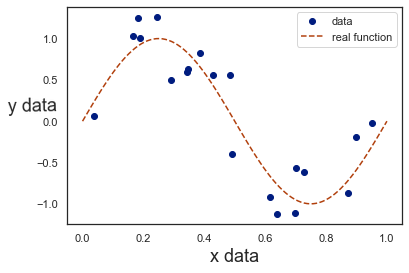

In [10]:
#plot the 'noisy' data

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

plt.plot(data['x'], data['y'], "o", label='data')
plt.xlabel("x data", fontsize=18)
plt.ylabel("y data", fontsize=18, rotation='1')

#plot the real function
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.legend()
plt.show()

### 1.3. Fit the model with higher-oder polynomial features

***Exercise:***

Using the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class from Scikit-learn's preprocessing library, create 20th order polynomial features.


<details>
    <summary>Click here for answer</summary>
<p>

```python
X_data = data[['x']]
Y_data = data['y']

degree = 20
pf = PolynomialFeatures(degree)
X_poly = pf.fit_transform(X_data)

```

</p>
</details>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### START CODE HERE ###

# Extract the X- and Y- data from the dataframe 
# data[['x']] returns a dataframe of x
X_data = data[['x']]
# data['y'] return series.
Y_data = data['y']

print(type(X_data))
print(type(Y_data))

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree) 

# Create the polynomial features
X_poly = pf.fit_transform(X_data)


### END CODE HERE ###

print(X_poly.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(20, 21)


X_data has the 20 data points. What do you think is the shape of X_poly? Print the X_poly to confirm.


<details>
    <summary>Click here for answer</summary>
<p>

(20,21). Although we specify degree 20 for the polynomial features, 21 features were generated because of the additional bias term. You can omit the bias term by specifying:
    
```python
pf = PolynomialFeatures(degree, include_bias=False)
```

</p>
</details>

Now we fit this data using linear regression.

In [23]:
lr = LinearRegression()

lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

Plot the resulting predicted value compared to the calculated data.

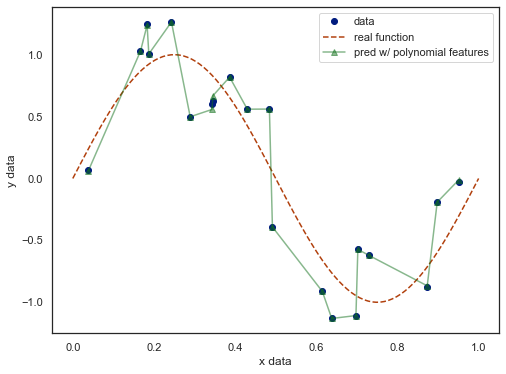

In [24]:
# Plot the result
plt.figure(figsize=(8,6))
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1.0)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=0.5, label='pred w/ polynomial features')
plt.legend()
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

***Exercise:***

What can you observe from the graph about the linear regression model trained with 20th degree polynomial features?
<br>
<details><summary>Click here for answer</summary>
The model overfits the data.
</details>


### 1.4. Use Regularized Model

Now we will use the regularized model such as Ridge and Lasso to fit the data with 20th degree polynomial features and observe the difference. 

***Exercise:***

- Perform the regression on the data with polynomial features using ridge regression ($alpha$=0.001) and lasso regression ($alpha$=0.0001). 
- Plot the results, as was done in section 1.3. 

<details>
    <summary>Click here for answer</summary>
<p>
    
```python
# Fit with ridge regression model
ridge = Ridge(alpha=0.0001)
ridge = ridge.fit(X_poly, Y_data)
Y_pred_ridge = ridge.predict(X_poly)
    
# Fit with lasso regression model
lasso = Lasso(alpha=0.0001)
lasso = lasso.fit(X_poly, Y_data)
Y_pred_lasso = lasso.predict(X_poly)
``` 

</p>
</details>



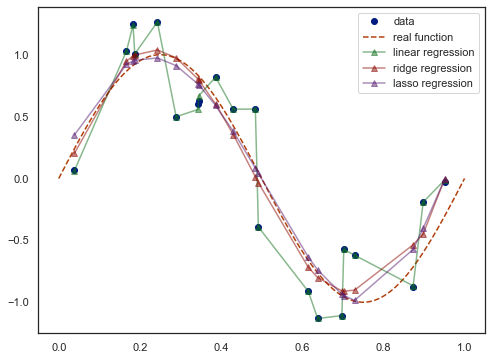

In [25]:
from sklearn.linear_model import Ridge, Lasso

### START CODE HERE ###

# Fit with ridge regression model
ridge = Ridge(alpha=0.0001)
ridge = ridge.fit(X_poly, Y_data)
Y_pred_ridge = ridge.predict(X_poly)
    
# Fit with lasso regression model
lasso = Lasso(alpha=0.0001)
lasso = lasso.fit(X_poly, Y_data)
Y_pred_lasso = lasso.predict(X_poly)

### END CODE HERE ###


plt.figure(figsize=(8,6))
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_ridge, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lasso, label='lasso regression', marker='^', alpha=.5)

plt.legend()


In [26]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_
coefficients['ridge regression'] = ridge.coef_
coefficients['lasso regression'] = lasso.coef_
coefficients = coefficients.applymap(abs)

coefficients.describe()  

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.783911e+13,4.545873,2.167284
std,6.038244e+13,5.094313,4.706731
min,1.622914e+07,0.000000,0.000000
25%,3.421984e+12,2.010479,0.000000
50%,3.623240e+13,3.259910,0.252181
75%,1.071032e+14,4.539545,1.641353
max,1.655707e+14,23.075093,20.176708


***Exercise***

What do you observe about the differences among coefficients of linear regression, ridge regression and lasso regression? 
<br>
<details>
    <summary>Click here for answer</summary>

The coefficients of non-regularized linear regression are very large, whereas the ridge regression and lasso regression have smaller coefficients.  For lasso too, there are also many coefficients that are 0 (25th percentile have values that are 0). 

Regularization (L1 or L2) shrinks the sizes of coefficients.
</details>

Here we plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients is plot using its own y-axis due to their much larger magnitude. 

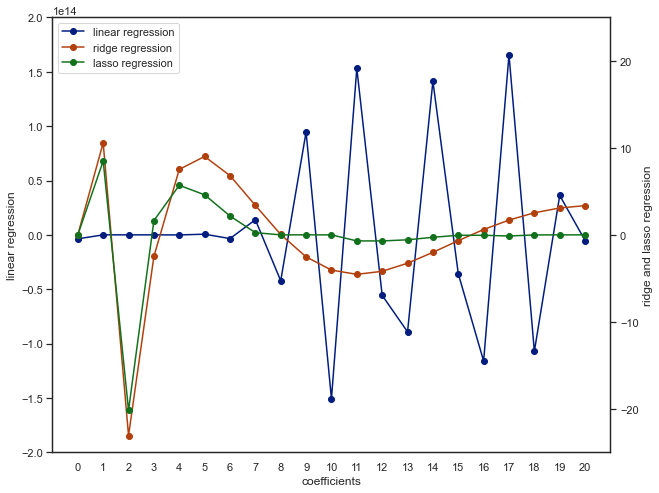

In [27]:
colors = sns.color_palette()

plt.figure(figsize=(10,8))
# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_, 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(ridge.coef_, 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lasso.coef_, 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

## Part 2 - Applying Regularization on Boston housing prices dataset



Now that we have seen the effects of L1/L2 regularization on the coefficients of linear model, we will now apply them on real dataset, the Boston housing prices.

In [28]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def load_scaled_boston_data():
    boston = load_boston()
    X = boston.data

    ## Never do this in real ML project. Here we fit the scalar to entire dataset, however,
    ## our purpose here is just have a scaled dataset to use
    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [29]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np

# This is not the correct way of doing. the scaling should only be done on training data, not the full set.
X, y = load_scaled_boston_data()

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Number of features in the datase: {}".format(X.shape[1]))

Number of features in the datase: 104


Here we compute the $R^2$ score (for easier comparison) of linear regression for both train and test score too see if there is overfitting

In [30]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 0.94
Test set score: 0.78
Number of features used: 104


Let's compare the scores with L2-regularized version using Ridge Regression, using different regularization strength (alpha)

In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge01.coef_ != 0)))

Training set score: 0.92
Test set score: 0.82
Number of features used: 104


In [32]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge1.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.81


In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge10.coef_ != 0)))

Training set score: 0.77
Test set score: 0.73
Number of features used: 104


***Exercises:***

How does regularization strength affects the bias and variance of the model? 
<br/>
<details><summary>Click here for answer</summary>
<p> 
In general, by increasing the regularization (increase values of alpha), we can see that the bias increases while the variance decreases.  
</p>
</details>

Let's inspect visually the coefficients of both linear regression and ridge regression with different regularization strength.

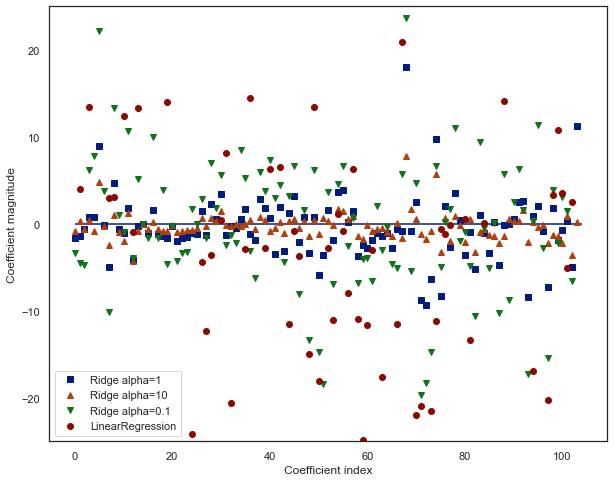

In [37]:
plt.figure(figsize=(10,8))
plt.plot(ridge1.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

As before, we can see that coefficients for non-regularized linear regression are much larger than regularized version.

Now let's compare Linear Regression with Lasso.

***Exercises:***

- Now fit the data using Lasso, with different alpha values \[0.0001, 0.01, 1.0 (default), 10\]
- For each lasso model, print the training set score, test set score and also number of coefficients not zero

<br/>
<details><summary>Click here for answer</summary>

```python
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
    
lasso1 = Lasso(alpha=1.0).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))

```
</details>



Now fit the data using Lasso, with different alpha values \[0.0001, 0.01, 1.0 (default)\]

In [38]:
### START CODE HERE ###
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
    
lasso1 = Lasso(alpha=1.0).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso1.coef_ != 0)))


### END CODE HERE ###

Training set score: 0.94
Test set score: 0.78
Number of features used: 102
Training set score: 0.89
Test set score: 0.80
Number of features used: 34
Training set score: 0.27
Test set score: 0.26
Number of features used: 3


***Exercise***

What happen to bias and variance when you increase the alpha of Lasso regression? Why is that so?
<br>
<details>
    <summary>Click here for answer</summary>
<p>
The bias has gone up and the variance has comed down. The last model with alpha=1 has such a high bias because Lasso drives most of the coefficients to 0 and left with 3 features. This is too simple a model and thus is not able to fit the training data well, thus the high bias.
</details>

Let us display the absolute values (ignore the negative sign) of the coefficients in a dataframe 

In [39]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_ 
coefficients['lasso alpha=0.0001'] = lasso00001.coef_ 
coefficients['lasso alpha=0.001'] = lasso001.coef_ 
coefficients['lasso alpha=1.0'] = lasso1.coef_
coefficients = coefficients.applymap(abs)
coefficients.describe()  

,linear regression,lasso alpha=0.0001,lasso alpha=0.001,lasso alpha=1.0
count,104.000000,104.000000,104.000000,104.000000
mean,82.473128,18.350040,2.376914,0.095197
std,251.321531,27.837422,5.725414,0.817488
min,0.108614,0.000000,0.000000,0.000000
25%,6.482828,4.158685,0.000000,0.000000
50%,20.897843,12.495187,0.000000,0.000000
75%,39.622143,22.463429,1.640367,0.000000
max,1820.719344,237.820043,34.960960,8.260696


Let's just visually inspect the  values of coefficients for lasso regression with different regularization strength. We can see that at alpha=1, most coefficients are zeros.

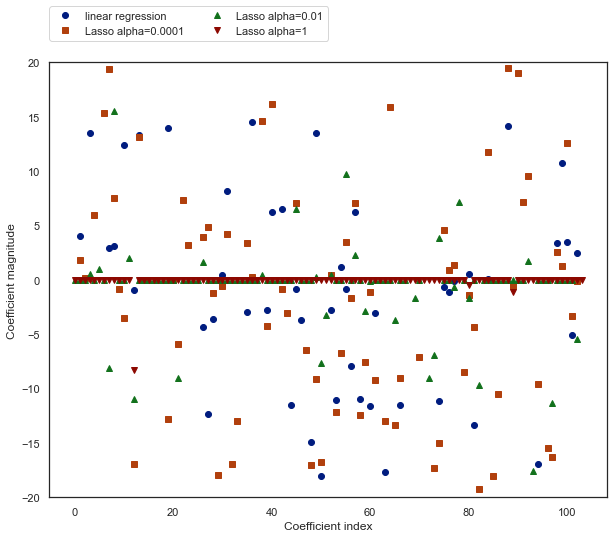

In [40]:
plt.figure(figsize=(10,8))
plt.plot(lr.coef_, 'o', label="linear regression")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso1.coef_, 'v', label="Lasso alpha=1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-20, 20)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In [41]:
lasso1.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -8.26069561, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  